In [1]:
#import all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras import Input
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.layers import Dense, Flatten

In [2]:
#define the image size and instantiate the 
image_size = [224, 224]
vgg = VGG16(weights='imagenet', input_shape=image_size + [3], 
            include_top=False)

#ensure the layers are not trained. In order words, the weights are used as is
for layer in vgg.layers:
    layer.trainable = False
    
#flatten the last layer and add a fully connected layer as output
hidden = Flatten()(vgg.output)
outputs = Dense(4, activation='softmax')(hidden)

#create the model
model = Model(inputs=vgg.input, outputs=outputs)

#check the model architecture
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [3]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')


In [4]:
train_data_gen = ImageDataGenerator(rescale=1.0/255, 
                               shear_range=0.5,
                                zoom_range=0.7, 
                                horizontal_flip=True,
                                vertical_flip=True)

test_data_gen = ImageDataGenerator(rescale=1.0/255)


In [5]:
train_data = train_data_gen.flow_from_directory('Weather/Train',
                                               target_size=(224, 224),
                                               class_mode='categorical')

test_data = test_data_gen.flow_from_directory('Weather/Test',
                                               target_size=(224, 224),
                                               class_mode='categorical')


Found 925 images belonging to 4 classes.
Found 200 images belonging to 4 classes.


In [6]:
#fit the model
history = model.fit_generator(train_data, validation_data=test_data, epochs=5)


C:\Users\DELL\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
29/29 [==============================] - 319s 11s/step - loss: 1.4127 - accuracy: 0.4863 - val_loss: 0.6467 - val_accuracy: 0.7450
Epoch 2/5
29/29 [==============================] - 374s 13s/step - loss: 0.6002 - accuracy: 0.7618 - val_loss: 0.3470 - val_accuracy: 0.9100
Epoch 3/5
29/29 [==============================] - 486s 17s/step - loss: 0.4497 - accuracy: 0.8289 - val_loss: 0.4633 - val_accuracy: 0.8400
Epoch 4/5
29/29 [==============================] - 417s 14s/step - loss: 0.3435 - accuracy: 0.8934 - val_loss: 0.2553 - val_accuracy: 0.9350
Epoch 5/5
29/29 [==============================] - 365s 13s/step - loss: 0.3673 - accuracy: 0.8671 - val_loss: 0.3239 - val_accuracy: 0.8800


Text(0, 0.5, 'Loss')

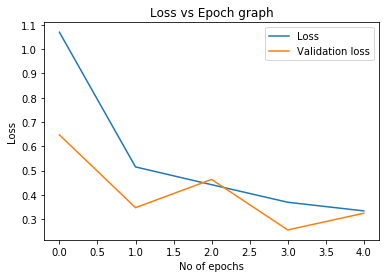

In [7]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')

plt.legend()
plt.title('Loss vs Epoch graph')
plt.xlabel('No of epochs')
plt.ylabel('Loss')

In [23]:
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.applications.vgg16 import preprocess_input

#load the image
my_image = load_img('weather_test.jpeg', target_size=(224, 224))

#preprocess the image
my_image = img_to_array(my_image)
my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
my_image = preprocess_input(my_image)

#make the prediction
prediction = model.predict(my_image)

In [24]:
prediction

array([[3.4296335e-28, 1.6078907e-13, 3.4901095e-19, 1.0000000e+00]],
      dtype=float32)

In [25]:
[np.round(x) for x in prediction]

[array([0., 0., 0., 1.], dtype=float32)]

In [ ]:
test_data = test_data_gen.flow('Weather/Test',
                                               target_size=(224, 224),
                                               class_mode='categorical')
